Question 1


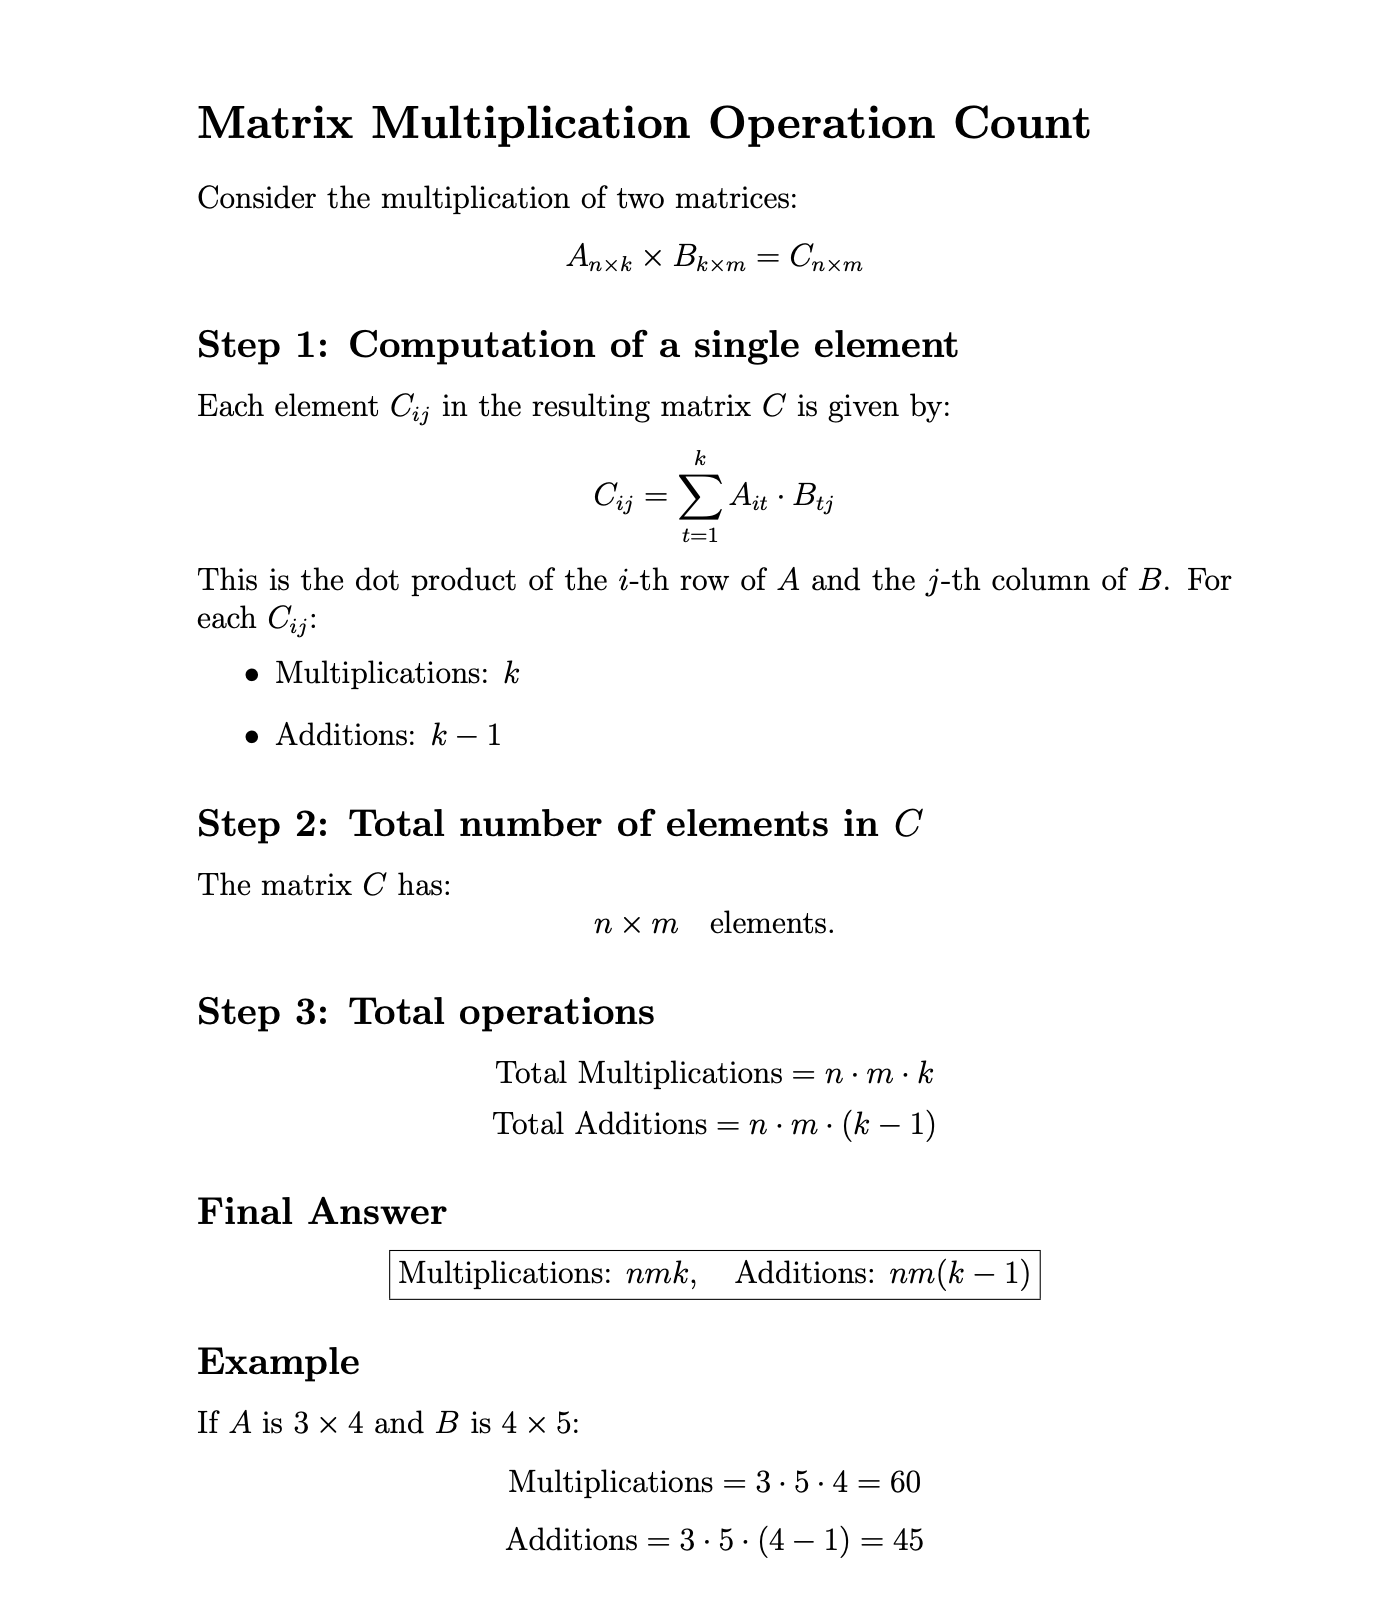



In [3]:
## Question 2

import random
import time
import numpy as np

# Matrix dimensions
n, k, m = 300, 400, 200

# Generate random matrices using Python lists
A_list = [[random.random() for _ in range(k)] for _ in range(n)]
B_list = [[random.random() for _ in range(m)] for _ in range(k)]

# Convert the same matrices to NumPy arrays
A_np = np.array(A_list)
B_np = np.array(B_list)

# Matrix multiplication using pure Python lists
def matmul_list(A, B):
    n_rows = len(A)
    k_cols = len(A[0])
    m_cols = len(B[0])

    # Initialize result matrix with zeros
    C = [[0.0 for _ in range(m_cols)] for _ in range(n_rows)]

    # Triple nested loop for matrix multiplication
    for i in range(n_rows):
        for j in range(m_cols):
            total = 0.0
            for p in range(k_cols):
                total += A[i][p] * B[p][j]
            C[i][j] = total
    return C

# Timing pure Python list multiplication
start_time = time.time()
C_list = matmul_list(A_list, B_list)
list_time = time.time() - start_time
print(f"List of lists time: {list_time:.4f} seconds")

# Timing NumPy's optimized matrix multiplication
start_time = time.time()
C_np = np.dot(A_np, B_np)
numpy_time = time.time() - start_time
print(f"NumPy time: {numpy_time:.4f} seconds")

print("""For large matrices, NumPy is usually much faster because its dot function
is implemented in highly optimized C/Fortran code. It takes advantage of low-level
CPU optimizations and efficient cache usage, while eliminating Python’s slow
per-element loop overhead by using vectorized operations.""")


List of lists time: 3.4405 seconds
NumPy time: 0.0022 seconds
For large matrices, NumPy is usually much faster because its dot function 
is implemented in highly optimized C/Fortran code. It takes advantage of low-level 
CPU optimizations and efficient cache usage, while eliminating Python’s slow 
per-element loop overhead by using vectorized operations.


In [ ]:
## Question 3

import random
import time
import numpy as np

# Number of elements in the array
num_elements = 2000

# Generate random integer data
data_list = [random.randint(0, 10**6) for _ in range(num_elements)]
data_np = np.array(data_list)

# 1. Naive method: repeatedly remove the largest element until reaching the median
def median_naive(lst):
    temp_list = lst.copy()
    median_index = len(temp_list) // 2
    for _ in range(median_index):
        max_val = max(temp_list)
        temp_list.remove(max_val)
    return max(temp_list)  # Approximate median if n is odd

# 2. Sorting method
def median_sort(lst):
    sorted_list = sorted(lst)
    length = len(sorted_list)
    if length % 2 == 1:
        return sorted_list[length // 2]
    else:
        return (sorted_list[length // 2 - 1] + sorted_list[length // 2]) / 2

# Timing: Naive method
start_time = time.time()
median1 = median_naive(data_list)
time_naive = time.time() - start_time

# Timing: Sorting method
start_time = time.time()
median2 = median_sort(data_list)
time_sort = time.time() - start_time

# Timing: NumPy median
start_time = time.time()
median3 = np.median(data_np)
time_numpy = time.time() - start_time

# Results
print(f"Naive method median: {median1}, Time: {time_naive:.6f} sec")
print(f"Sorting method median: {median2}, Time: {time_sort:.6f} sec")
print(f"NumPy median: {median3}, Time: {time_numpy:.6f} sec")
print("NumPy → Fastest, because it uses optimized C code and partition-based algorithms like quickselect.")


Question 4


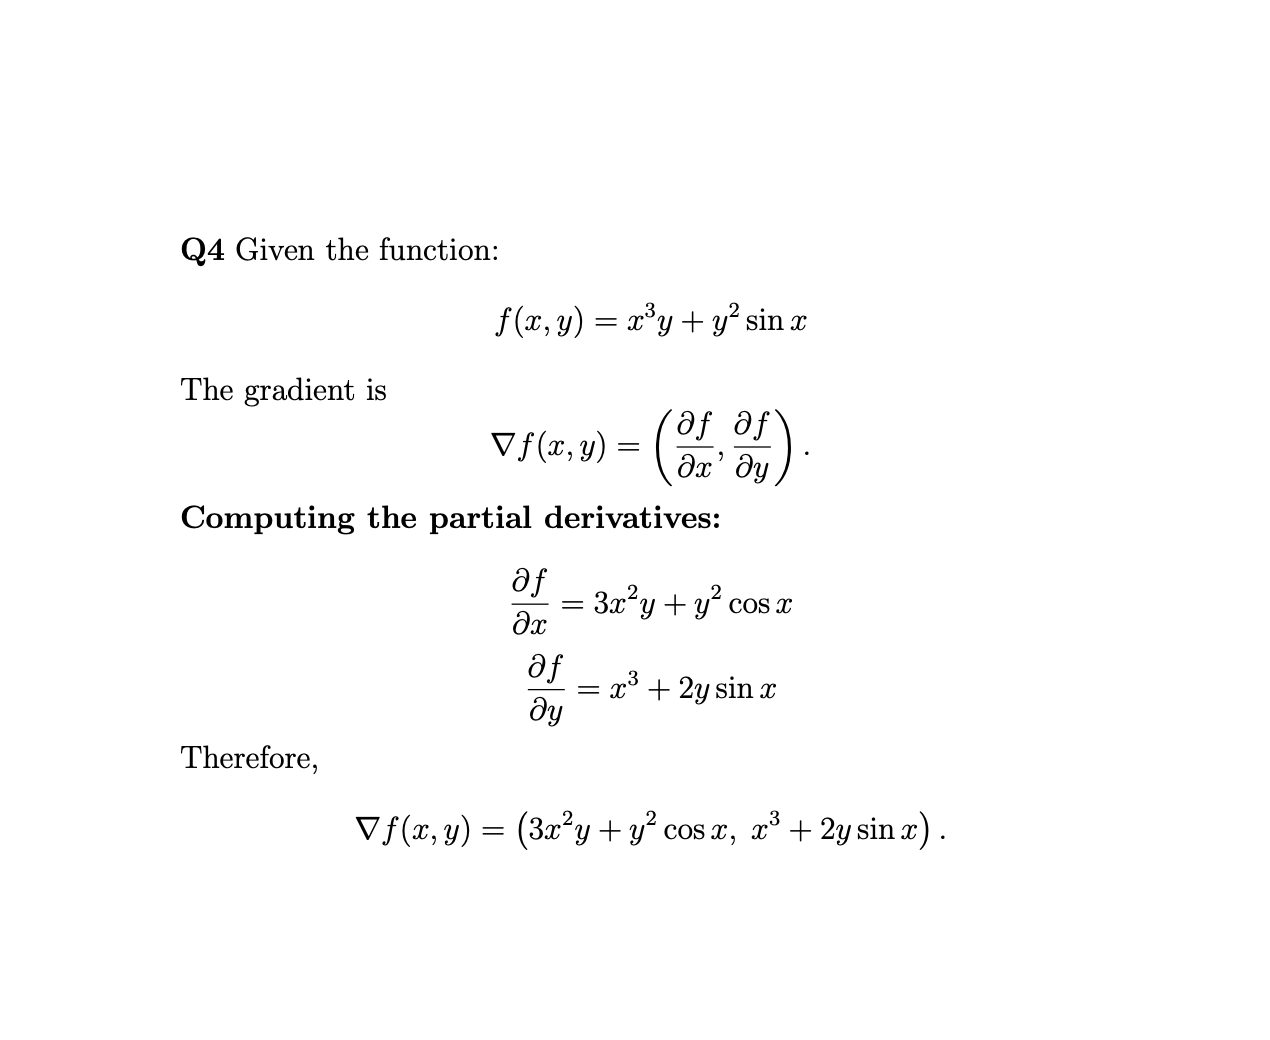

In [5]:
## Question 5
import jax
import jax.numpy as jnp

# Define the function f(x, y)
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Analytical gradient computation
def compute_analytical_gradient(x, y):
    partial_x = 2 * x * y + y**3 * jnp.cos(x)
    partial_y = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([partial_x, partial_y])

# Wrap function for JAX gradient
f_vector_input = lambda vars: f(vars[0], vars[1])
jax_gradient_fn = jax.grad(f_vector_input)

# Points to test
points_to_test = [(1.0, 2.0), (-1.5, 0.5), (0.7, -1.2)]

# Compare analytical and JAX gradients
for x_val, y_val in points_to_test:
    grad_analytical = compute_analytical_gradient(x_val, y_val)
    grad_jax = jax_gradient_fn(jnp.array([x_val, y_val]))

    print(f"x = {x_val}, y = {y_val}")
    print("  Analytical Gradient:", grad_analytical)
    print("  JAX Gradient:", grad_jax)


x = 1.0, y = 2.0
  Analytical Gradient: [ 8.322418  11.0976515]
  JAX Gradient: [ 8.322418  11.0976515]
x = -1.5, y = 0.5
  Analytical Gradient: [-1.4911579  1.5018787]
  JAX Gradient: [-1.4911579  1.5018787]
x = 0.7, y = -1.2
  Analytical Gradient: [-3.0016475  3.2730205]
  JAX Gradient: [-3.0016475  3.2730205]


In [6]:
## Question 6
import sympy as sp

# Define symbols
x1, x2 = sp.symbols('x1 x2')

# Define the function: f(x1, x2) = x1^2 + 3*x1*x2 + sin(x2)
f_expr = x1**2 + 3*x1*x2 + sp.sin(x2)

# Compute the symbolic gradient
gradient_f = [sp.diff(f_expr, var) for var in (x1, x2)]

print("Symbolic Gradient:")
print(gradient_f)

# Evaluate the gradient at a specific point (x1=1, x2=2)
point = {x1: 1, x2: 2}
gradient_at_point = [g.evalf(subs=point) for g in gradient_f]

print("\nGradient at (x1=1, x2=2):")
print(gradient_at_point)


Symbolic Gradient:
[2*x1 + 3*x2, 3*x1 + cos(x2)]

Gradient at (x1=1, x2=2):
[8.00000000000000, 2.58385316345286]


In [7]:
## Question 7

# Student data organized by year, branch, and individual details
students_data = {
    2022: {
        "Branch 1": [
            {"Roll Number": 1, "Name": "N", "Marks": {"Maths": 100, "English": 70}},
            {"Roll Number": 2, "Name": "M", "Marks": {"Maths": 95, "English": 85}}
        ],
        "Branch 2": [
            {"Roll Number": 3, "Name": "P", "Marks": {"Maths": 88, "English": 76}}
        ]
    },
    2023: {"Branch 1": [], "Branch 2": []},
    2024: {"Branch 1": [], "Branch 2": []},
    2025: {"Branch 1": [], "Branch 2": []}
}

# Example: Access Maths marks for Roll Number 1 in 2022, Branch 1
math_marks_roll1 = students_data[2022]["Branch 1"][0]["Marks"]["Maths"]
print(math_marks_roll1)


100


In [9]:
## Question 8
class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks  # {subject: score}

    def __repr__(self):
        return f"Student(Roll: {self.roll_no}, Name: {self.name}, Marks: {self.marks})"


class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []  # list of Student objects

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch({self.branch_name}, Students={len(self.students)})"


class Year:
    def __init__(self, year_value):
        self.year_value = year_value
        self.branches = []  # list of Branch objects

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year({self.year_value}, Branches={len(self.branches)})"


# Create database (list of Year objects)
database = []

# --- Adding Year 2022 Data ---
year_2022 = Year(2022)

branch_1_2022 = Branch("Branch 1")
branch_1_2022.add_student(Student(1, "N", {"Maths": 100, "English": 70}))
branch_1_2022.add_student(Student(2, "M", {"Maths": 95, "English": 85}))

branch_2_2022 = Branch("Branch 2")
branch_2_2022.add_student(Student(3, "P", {"Maths": 88, "English": 76}))

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

database.append(year_2022)

# --- Adding Year 2023 Data (Empty Branches) ---
year_2023 = Year(2023)
year_2023.add_branch(Branch("Branch 1"))
year_2023.add_branch(Branch("Branch 2"))

database.append(year_2023)

# --- Displaying the Database ---
for year in database:
    print(year.year_value)
    for branch in year.branches:
        print(" ", branch.branch_name)
        for student in branch.students:
            print(f"    Roll No: {student.roll_no}, Name: {student.name}, Marks: {student.marks}")


2022
  Branch 1
    Roll No: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
    Roll No: 2, Name: M, Marks: {'Maths': 95, 'English': 85}
  Branch 2
    Roll No: 3, Name: P, Marks: {'Maths': 88, 'English': 76}
2023
  Branch 1
  Branch 2


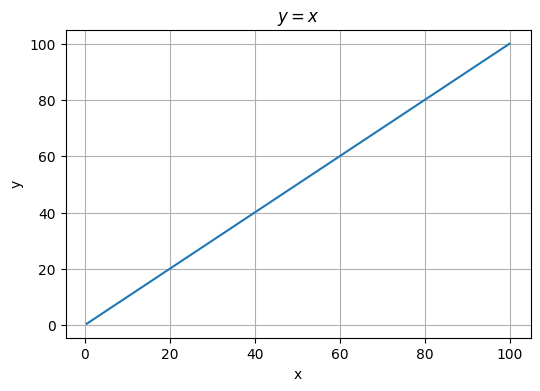

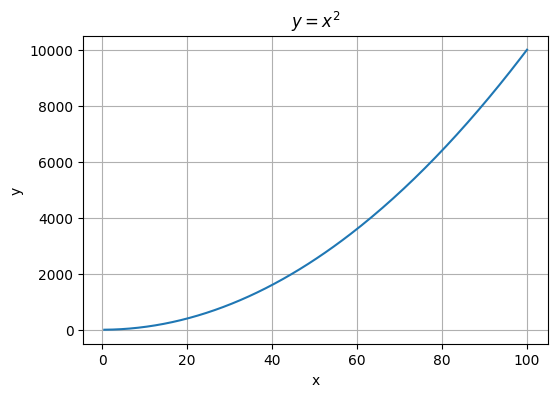

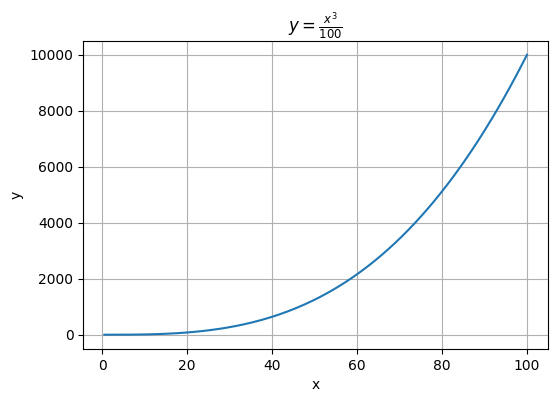

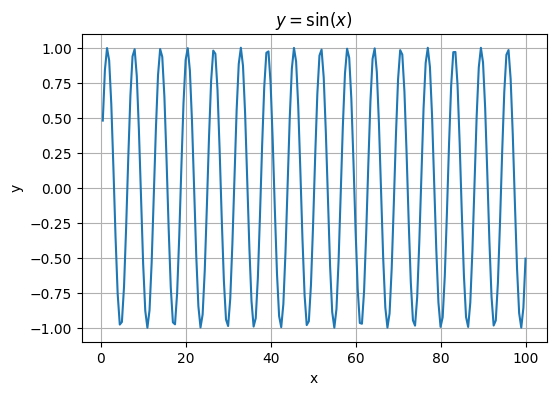

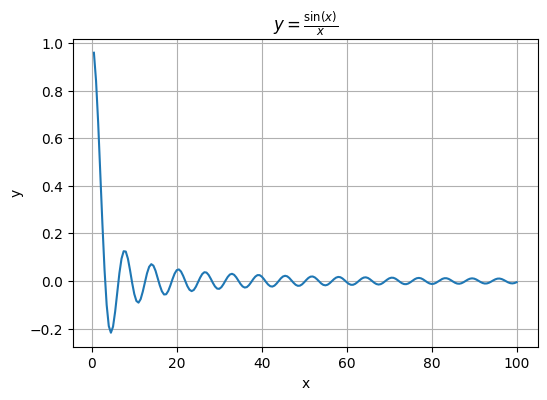

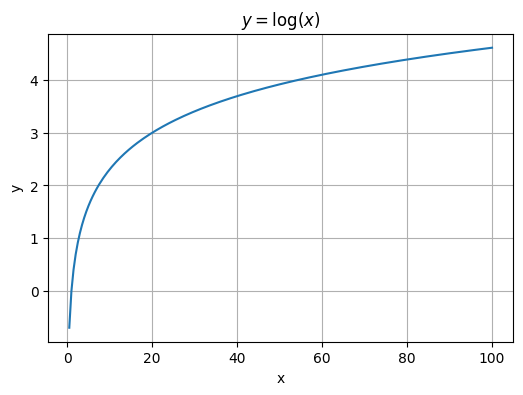

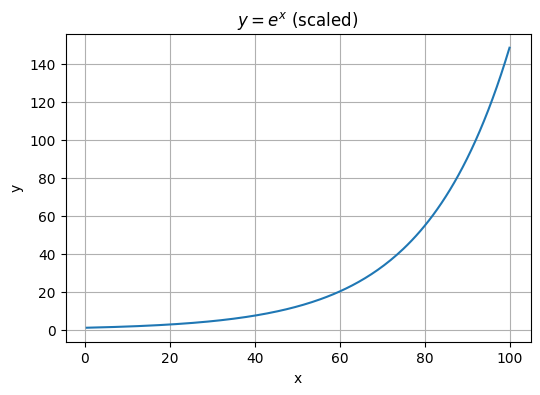

In [10]:
## Question 9

import numpy as np
import matplotlib.pyplot as plt

# Define domain for all functions
x_values = np.arange(0.5, 100.5, 0.5)

# List of (function values, LaTeX label)
functions_list = [
    (x_values, r"$y = x$"),
    (x_values ** 2, r"$y = x^2$"),
    ((x_values ** 3) / 100, r"$y = \frac{x^3}{100}$"),
    (np.sin(x_values), r"$y = \sin(x)$"),
    (np.sin(x_values) / x_values, r"$y = \frac{\sin(x)}{x}$"),
    (np.log(x_values), r"$y = \log(x)$"),
    (np.exp(x_values / 20), r"$y = e^x \ \text{(scaled)}$")
]

# Plot each function separately
for y_values, label in functions_list:
    plt.figure(figsize=(6, 4))
    plt.plot(x_values, y_values)
    plt.title(label)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()


In [12]:
# Question 10
import numpy as np
import pandas as pd

# Generate a 20x5 matrix with random numbers between 1 and 2
data = np.random.uniform(1, 2, size=(20, 5))

# Create DataFrame with column names
df = pd.DataFrame(data, columns=["a", "b", "c", "d", "e"])

# Identify column with the highest standard deviation
max_std_column = df.std().idxmax()

# Identify row index with the lowest mean value
min_mean_row_index = df.mean(axis=1).idxmin()

# Display results
print("DataFrame:\n", df)
print("\nColumn with highest standard deviation:", max_std_column)
print("Row index with lowest mean:", min_mean_row_index)


DataFrame:
            a         b         c         d         e
0   1.973818  1.785241  1.193047  1.821111  1.601523
1   1.490353  1.051528  1.623241  1.130366  1.819108
2   1.274863  1.393108  1.313355  1.593514  1.709936
3   1.339938  1.902772  1.666599  1.704542  1.320420
4   1.746489  1.532443  1.544506  1.899375  1.044499
5   1.311442  1.486006  1.494690  1.343509  1.810322
6   1.807647  1.272747  1.052475  1.185849  1.329852
7   1.231686  1.813814  1.478925  1.545946  1.637324
8   1.082070  1.868546  1.205366  1.471447  1.877358
9   1.476793  1.762413  1.880483  1.867634  1.146103
10  1.141865  1.206560  1.669617  1.846184  1.555196
11  1.568960  1.737076  1.895995  1.288843  1.395734
12  1.906964  1.083806  1.590957  1.085201  1.459699
13  1.262250  1.392749  1.745925  1.117036  1.443767
14  1.881993  1.505608  1.507841  1.097459  1.783500
15  1.269998  1.155435  1.051835  1.996793  1.688021
16  1.694802  1.515713  1.385287  1.998008  1.535121
17  1.950026  1.263226  1.695015  

In [13]:
## Question 11

# Add column 'f' as the row-wise sum of columns a–e
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)

# Add column 'g' based on whether 'f' is less than 8
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

# Count rows where g = "LT8"
lt8_count = (df["g"] == "LT8").sum()

# Calculate standard deviation of 'f' for LT8 and GT8 groups
std_lt8 = df.loc[df["g"] == "LT8", "f"].std()
std_gt8 = df.loc[df["g"] == "GT8", "f"].std()

# Display results
print(df)
print(f"\nNumber of rows where g = LT8: {lt8_count}")
print(f"Standard deviation of f (LT8): {std_lt8}")
print(f"Standard deviation of f (GT8): {std_gt8}")


           a         b         c         d         e         f    g
0   1.973818  1.785241  1.193047  1.821111  1.601523  8.374740  GT8
1   1.490353  1.051528  1.623241  1.130366  1.819108  7.114596  LT8
2   1.274863  1.393108  1.313355  1.593514  1.709936  7.284776  LT8
3   1.339938  1.902772  1.666599  1.704542  1.320420  7.934271  LT8
4   1.746489  1.532443  1.544506  1.899375  1.044499  7.767312  LT8
5   1.311442  1.486006  1.494690  1.343509  1.810322  7.445970  LT8
6   1.807647  1.272747  1.052475  1.185849  1.329852  6.648570  LT8
7   1.231686  1.813814  1.478925  1.545946  1.637324  7.707695  LT8
8   1.082070  1.868546  1.205366  1.471447  1.877358  7.504788  LT8
9   1.476793  1.762413  1.880483  1.867634  1.146103  8.133426  GT8
10  1.141865  1.206560  1.669617  1.846184  1.555196  7.419422  LT8
11  1.568960  1.737076  1.895995  1.288843  1.395734  7.886608  LT8
12  1.906964  1.083806  1.590957  1.085201  1.459699  7.126628  LT8
13  1.262250  1.392749  1.745925  1.117036  1.44

In [14]:
## Question 12
import numpy as np

# Define a 3x3 matrix
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Define a 1D array
b = np.array([10, 20, 30])

# Broadcasting: add array 'b' to each row of matrix 'A'
C = A + b

# Display results
print("Matrix A:\n", A)
print("\nArray b:\n", b)
print("\nBroadcasted Addition (A + b):\n", C)


Matrix A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Array b:
 [10 20 30]

Broadcasted Addition (A + b):
 [[11 22 33]
 [14 25 36]
 [17 28 39]]


In [15]:
## Question 13
import numpy as np

# Custom implementation of argmin
def my_argmin(arr):
    min_index = 0  # Start with first element as minimum
    for i in range(1, len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i
    return min_index

# Example array
arr = np.array([4, 2, 7, 1, 9])

# Get index of minimum element using custom function
custom_result = my_argmin(arr)

# Get index of minimum element using NumPy
numpy_result = np.argmin(arr)

# Display results
print("Array:", arr)
print("Custom argmin index:", custom_result)
print("NumPy argmin index:", numpy_result)
print("Results match?", custom_result == numpy_result)


Array: [4 2 7 1 9]
Custom argmin index: 3
NumPy argmin index: 3
Results match? True
